In [42]:
# importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

In [43]:
# leemos el dataset
df = pd.read_excel('regression/regression_data.xls')


In [44]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id   date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21592  False  False     False      False        False     False   False   
21593  False  False     False      False        False     False   False   
21594  False  False     False      False        False     False   False   
21595  False  False     False      False        False     False   False   
21596  False  False     False      False        False     False   False   

       waterfront   view  condition  

<AxesSubplot:>

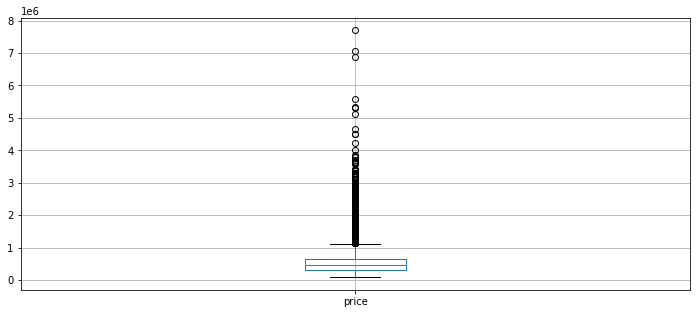

In [45]:
# Hacemos un boxplot para ver los outliers  
df.boxplot(column=['price'],figsize=(12,5))

In [46]:
# Vemos en el boxplot que a partir de 1000000 son outliers y nos quedamos con los que valen menos de 100000
df = df[df['price'] < 1000000]

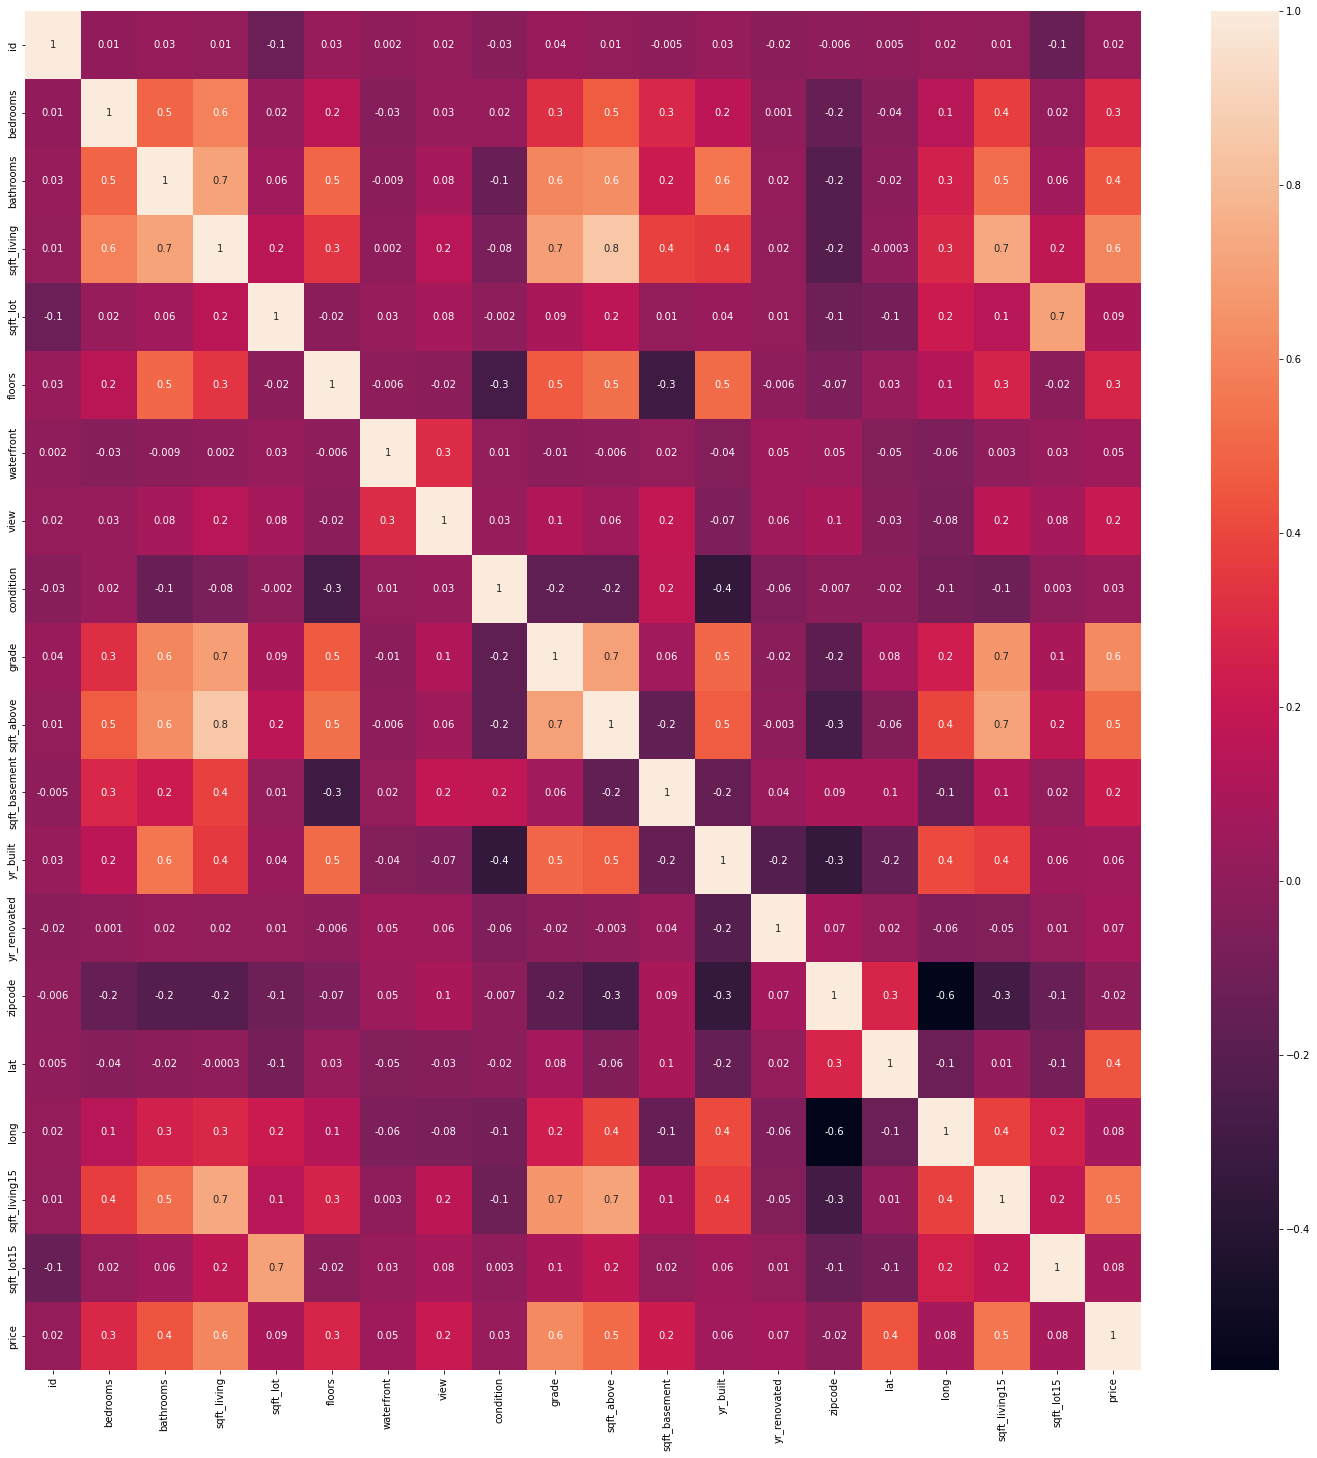

In [47]:
# Hacemos la matriz de correlacion para ver la relacion que tiene cada columna con la columna price
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt='.1g')
plt.show()

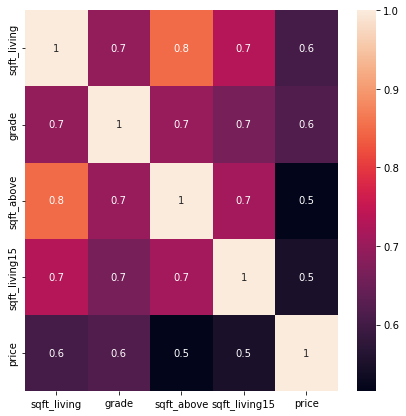

In [48]:
# Borramos las columnas que tienen menos de 0.5 de relacion con el precio ya que no nos va a ayudar para predecir el precio de u a casa
dfh = df.drop(df.corr()['price'].sort_values(ascending=False)[df.corr()['price'].sort_values(ascending=False) < 0.5].index, inplace = True, axis = 1)
# pintamos la matriz de correlacion para ver que estan mas de 0.5 de relacion
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(method = 'pearson'), annot=True, fmt='.1g')
plt.show()

Error cuadrático medio:  23528820215.837143
Coeficientes:  [155.8663942]
Coeficientes de determinación:  0.37148254032193784


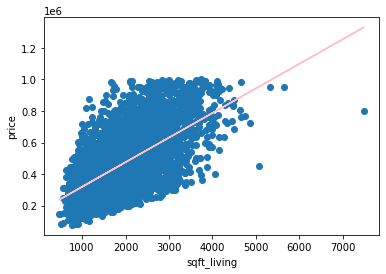

In [49]:
# modelo de regresion lineal


X = df[['sqft_living']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print('Error cuadrático medio: ',mean_squared_error(y_test, y_pred))
# Coeficientes
print('Coeficientes: ', model.coef_)

# Coeficiente de determinacion
print('Coeficientes de determinación: ', model.score(X_test, y_test))

# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.plot(X_test, y_pred, color='pink')
plt.show()

Error cuadrático medio:  27558927414.94635
Coeficientes:  [141.72630416]
Coeficientes de determinación:  0.2638276423806699


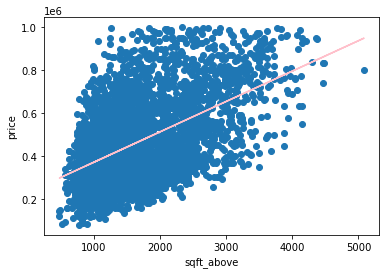

In [50]:
# modelo de regresion lineal


X = df[['sqft_above']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print('Error cuadrático medio: ',mean_squared_error(y_test, y_pred))
# Coeficientes
print('Coeficientes: ', model.coef_)

# Coeficiente de determinacion
print('Coeficientes de determinación: ', model.score(X_test, y_test))

# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.plot(X_test, y_pred, color='pink')
plt.show()

Error cuadrático medio:  23168078606.03491
Coeficientes:  [119504.89311235]
Coeficientes de determinación:  0.3811189095964356


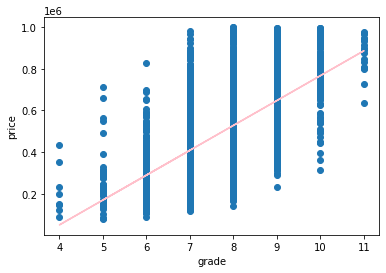

In [51]:
# modelo de regresion lineal


X = df[['grade']]   
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# calcular el R2
model.score(X_test, y_test)

# calcular el MSE
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print('Error cuadrático medio: ',mean_squared_error(y_test, y_pred))
# Coeficientes
print('Coeficientes: ', model.coef_)

# Coeficiente de determinacion
print('Coeficientes de determinación: ', model.score(X_test, y_test))

# Graficar
plt.scatter(X_test, y_test)
plt.xlabel('grade')
plt.ylabel('price')
plt.plot(X_test, y_pred, color='pink')
plt.show()

In [52]:
# haz una variable llamada X que tenga todas las columnas menos price
X = df[['sqft_living','sqft_living15','sqft_above','grade']]
# haz una variable llamada y que tenga la columna price
y = df['price']
# haz un split de los datos de entrenamiento y de test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# haz un modelo de regresion lineal
regressor = LinearRegression()
# entrena el modelo
regressor.fit(X_train, y_train)
# haz una prediccion
y_pred = regressor.predict(X_test)
print('Coeficientes: ', model.coef_)
print('Error cuadrático medio: ',mean_squared_error(y_test, y_pred))
# Coeficientes

# Coeficiente de determinacion
print('Coeficientes de determinación %2f' % r2_score(y_test, y_pred))



Coeficientes:  [119504.89311235]
Error cuadrático medio:  20155106989.41608
Coeficientes de determinación 0.461603


In [53]:
! pip install streamlit


     |████████████████████████████████| 9.1 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 25.1 MB 1.9 MB/s eta 0:00:01     |███████████████▎                | 12.0 MB 2.0 MB/s eta 0:00:07
     |████████████████████████████████| 982 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 164 kB 9.8 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 237 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 51 kB 23.9 MB/s eta 0:00:01
     |████████████████████████████████| 340 kB 9.1 MB/s eta 0:00:01
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=9c0c81ccc577ff58e2ab1aa4559f836304222fe1a017c097dccb56a4c8424173
  Stored in director

In [54]:
! pip install pyngrok

     |████████████████████████████████| 761 kB 8.5 MB/s eta 0:00:01
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=a1118c0ae8eafecb2e2f0e186319150523a3c8a6eb724750d769719ee88b45b0
  Stored in directory: /Users/juanlu_navarro/Library/Caches/pip/wheels/f6/89/59/49d4249e00957e94813ac136a335d10ed2e09a856c5096f95c
Successfully built pyngrok


In [61]:
! pip install streamlit
import streamlit as st
st.title("Proyecto casas")
st.write("Es ni primera app")
st.show()


AttributeError: module 'streamlit' has no attribute 'show'